# Uderstanding User Experience Using Dental Reviews from Yelp

**Import libraries**

In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd                  #data processing e.g. reading files (pd.read_csv)
import numpy as np                   #linear algebra
import matplotlib.pyplot as plt      #plotting and visualization
import seaborn as sns                #visualization
import nltk
from nltk.corpus import stopwords
import requests
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = 8,4

%matplotlib inline

**Scrapping Dentist Information from Yelp using BeautifulSoup and Python**

In [2]:
html1 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY")
html2 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY&start=10")
html3 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY&start=20")
html4 = urlopen("https://www.yelp.com/search?find_desc=Dentists&find_loc=New%20York%2C%20NY&start=30")
bsObj1 = BeautifulSoup(html1)
bsObj2 = BeautifulSoup(html2)
bsObj3 = BeautifulSoup(html3)
bsObj4 = BeautifulSoup(html4)

**Identify specific item in the HTML data and extract the name of dentist, 
total reviews, and description of the reviews**

In [3]:
#Get the Names Dentist
nameList = bsObj1.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for name in nameList:
 print(name.get_text())

nameList = bsObj2.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for name in nameList:
 print(name.get_text())

nameList = bsObj3.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for name in nameList:
 print(name.get_text())

nameList = bsObj4.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for name in nameList:
 print(name.get_text())

Pangborn Family Dentistry
1. Midtown Dental Group
2. Tribeca Dental Design
3. Lumia Dental
4. iSmile Dental
5. Stanton E Young, DMD
6. Bowery Dental
7. Sunny Dental Care
8. PDADental
9. Grand Street Dental
10. Brooklyn Heights Dental
Pangborn Family Dentistry
11. Sonny Torres Oliva, DDS
12. VIP Dental Care
13. All Smiles Dentistry
14. The Dental Boutique
15. Clarence Loflin, DDS
16. Chelsea Dental Arts
17. Bococa Dental
18. Tu’s Dental
19. 209 NYC Dental
20. Eric Steinbach, DDS - Park Slope Dental Aesthetics
Pangborn Family Dentistry
21. NYC Smile Spa
22. Kevin J Hansen, DDS
23. Dental Arts of Hoboken: Michael Moawad, DMD
24. Irina Rossinski, DDS
25. Central Park West Dentistry
26. All Smiles
27. Patient Friendly Dental
28. Modern Family Dentistry
29. Souferian B, DDS PC
30. Nai Yan Lam, DDS
Pangborn Family Dentistry
31. Shu Ping Rong, DDS, PC
32. Pearl Dental NYC
33. South Brooklyn Dentist
34. Gregg V Monterosso, DMD, PC
35. Lee Gold, DDS
36. Chatham Square Oral & Maxillofacial Surger

In [4]:
#Get Total Reviews
nameList = bsObj1.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

nameList = bsObj2.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

nameList = bsObj3.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

nameList = bsObj4.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for name in nameList:
 print(name.get_text())

124 reviews
129 reviews
38 reviews
87 reviews
33 reviews
43 reviews
28 reviews
209 reviews
24 reviews
22 reviews
64 reviews
91 reviews
31 reviews
47 reviews
97 reviews
38 reviews
22 reviews
42 reviews
155 reviews
43 reviews
51 reviews
34 reviews
29 reviews
77 reviews
78 reviews
61 reviews
53 reviews
57 reviews
15 reviews
20 reviews
86 reviews
56 reviews
38 reviews
21 reviews
26 reviews
117 reviews
14 reviews
52 reviews
13 reviews
47 reviews


In [5]:
#Create a list that I will populate all the extracted names into.
Name1 = []
nameList = bsObj1.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for i in nameList:
 #print(name.get_text())
    Name1.append(i.text)
    
Name2 = []
nameList = bsObj2.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for i in nameList:
 #print(name.get_text())
    Name2.append(i.text)
    
Name3 = []
nameList = bsObj3.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for i in nameList:
 #print(name.get_text())
    Name3.append(i.text)
    
Name4 = []
nameList = bsObj4.find_all('div', {'class': 'lemon--div__373c0__1mboc businessName__373c0__1fTgn border-color--default__373c0__2oFDT'})
for i in nameList:
 #print(name.get_text())
    Name4.append(i.text)

In [6]:
#Name1 list of all dentist
Name1

['Pangborn Family Dentistry',
 '1.\xa0Midtown Dental Group',
 '2.\xa0Tribeca Dental Design',
 '3.\xa0Lumia Dental',
 '4.\xa0iSmile Dental',
 '5.\xa0Stanton E Young, DMD',
 '6.\xa0Bowery Dental',
 '7.\xa0Sunny Dental Care',
 '8.\xa0PDADental',
 '9.\xa0Grand Street Dental',
 '10.\xa0Brooklyn Heights Dental']

In [7]:
#Name2 list of all dentist
Name2

['Pangborn Family Dentistry',
 '11.\xa0Sonny Torres Oliva, DDS',
 '12.\xa0VIP Dental Care',
 '13.\xa0All Smiles Dentistry',
 '14.\xa0The Dental Boutique',
 '15.\xa0Clarence Loflin, DDS',
 '16.\xa0Chelsea Dental Arts',
 '17.\xa0Bococa Dental',
 '18.\xa0Tu’s Dental',
 '19.\xa0209 NYC Dental',
 '20.\xa0Eric Steinbach, DDS - Park Slope Dental Aesthetics']

In [8]:
#Name3 list of all dentist
Name3

['Pangborn Family Dentistry',
 '21.\xa0NYC Smile Spa',
 '22.\xa0Kevin J Hansen, DDS',
 '23.\xa0Dental Arts of Hoboken: Michael Moawad, DMD',
 '24.\xa0Irina Rossinski, DDS',
 '25.\xa0Central Park West Dentistry',
 '26.\xa0All Smiles',
 '27.\xa0Patient Friendly Dental',
 '28.\xa0Modern Family Dentistry',
 '29.\xa0Souferian B, DDS PC',
 '30.\xa0Nai Yan Lam, DDS']

In [9]:
#Name3 list of all dentist
Name4

['Pangborn Family Dentistry',
 '31.\xa0Shu Ping Rong, DDS, PC',
 '32.\xa0Pearl Dental NYC',
 '33.\xa0South Brooklyn Dentist',
 '34.\xa0Gregg V Monterosso, DMD, PC',
 '35.\xa0Lee Gold, DDS',
 '36.\xa0Chatham Square Oral & Maxillofacial Surgery',
 '37.\xa0Olga Malkin, DMD',
 '38.\xa0Joseph S Dallessandro, DDS',
 '39.\xa0The Chelsea Dental Group',
 '40.\xa0Win Le, DDS']

**Clean all the list and extract only the names of the dentist**

In [10]:
Name1 = Name1[1:11]
Name1

['1.\xa0Midtown Dental Group',
 '2.\xa0Tribeca Dental Design',
 '3.\xa0Lumia Dental',
 '4.\xa0iSmile Dental',
 '5.\xa0Stanton E Young, DMD',
 '6.\xa0Bowery Dental',
 '7.\xa0Sunny Dental Care',
 '8.\xa0PDADental',
 '9.\xa0Grand Street Dental',
 '10.\xa0Brooklyn Heights Dental']

In [11]:
Name2 = Name2[1:11]
Name2

['11.\xa0Sonny Torres Oliva, DDS',
 '12.\xa0VIP Dental Care',
 '13.\xa0All Smiles Dentistry',
 '14.\xa0The Dental Boutique',
 '15.\xa0Clarence Loflin, DDS',
 '16.\xa0Chelsea Dental Arts',
 '17.\xa0Bococa Dental',
 '18.\xa0Tu’s Dental',
 '19.\xa0209 NYC Dental',
 '20.\xa0Eric Steinbach, DDS - Park Slope Dental Aesthetics']

In [12]:
Name3 = Name3[1:11]
Name3

['21.\xa0NYC Smile Spa',
 '22.\xa0Kevin J Hansen, DDS',
 '23.\xa0Dental Arts of Hoboken: Michael Moawad, DMD',
 '24.\xa0Irina Rossinski, DDS',
 '25.\xa0Central Park West Dentistry',
 '26.\xa0All Smiles',
 '27.\xa0Patient Friendly Dental',
 '28.\xa0Modern Family Dentistry',
 '29.\xa0Souferian B, DDS PC',
 '30.\xa0Nai Yan Lam, DDS']

In [13]:
Name4 = Name4[1:11]
Name4

['31.\xa0Shu Ping Rong, DDS, PC',
 '32.\xa0Pearl Dental NYC',
 '33.\xa0South Brooklyn Dentist',
 '34.\xa0Gregg V Monterosso, DMD, PC',
 '35.\xa0Lee Gold, DDS',
 '36.\xa0Chatham Square Oral & Maxillofacial Surgery',
 '37.\xa0Olga Malkin, DMD',
 '38.\xa0Joseph S Dallessandro, DDS',
 '39.\xa0The Chelsea Dental Group',
 '40.\xa0Win Le, DDS']

**Join all the list of Dentist Names into one list**

In [14]:
Name = Name1 + Name2 + Name3 + Name4
Name

['1.\xa0Midtown Dental Group',
 '2.\xa0Tribeca Dental Design',
 '3.\xa0Lumia Dental',
 '4.\xa0iSmile Dental',
 '5.\xa0Stanton E Young, DMD',
 '6.\xa0Bowery Dental',
 '7.\xa0Sunny Dental Care',
 '8.\xa0PDADental',
 '9.\xa0Grand Street Dental',
 '10.\xa0Brooklyn Heights Dental',
 '11.\xa0Sonny Torres Oliva, DDS',
 '12.\xa0VIP Dental Care',
 '13.\xa0All Smiles Dentistry',
 '14.\xa0The Dental Boutique',
 '15.\xa0Clarence Loflin, DDS',
 '16.\xa0Chelsea Dental Arts',
 '17.\xa0Bococa Dental',
 '18.\xa0Tu’s Dental',
 '19.\xa0209 NYC Dental',
 '20.\xa0Eric Steinbach, DDS - Park Slope Dental Aesthetics',
 '21.\xa0NYC Smile Spa',
 '22.\xa0Kevin J Hansen, DDS',
 '23.\xa0Dental Arts of Hoboken: Michael Moawad, DMD',
 '24.\xa0Irina Rossinski, DDS',
 '25.\xa0Central Park West Dentistry',
 '26.\xa0All Smiles',
 '27.\xa0Patient Friendly Dental',
 '28.\xa0Modern Family Dentistry',
 '29.\xa0Souferian B, DDS PC',
 '30.\xa0Nai Yan Lam, DDS',
 '31.\xa0Shu Ping Rong, DDS, PC',
 '32.\xa0Pearl Dental NYC',
 '3

In [15]:
#Create a list that I will populate all the extracted Reviews description into.
Review1 = []
review = bsObj1.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review1.append(i.text)


Review2 = []
review = bsObj2.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review2.append(i.text)

Review3 = []
review = bsObj3.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review3.append(i.text)

Review4 = []
review = bsObj4.findAll("p", {"class":"lemon--p__373c0__3Qnnj text__373c0__2pB8f text__373c0__2P1WD text-color--normal__373c0__K_MKN text-align--left__373c0__2pnx_"})
for i in review:
 Review4.append(i.text)

**Clean all the list and extract only the review description of the dentist**

In [16]:
Review1 = Review1[0:10]
Review1

['general dentistry, oral surgery, cosmetic dentistry\xa0read more',
 ' was worth it. Staff is friendly and the clinic is clean and well kept. I was happy with my cleaning, I had a slight issue with my billing and when I reached out to them, they were quick to explain it to me and…\xa0read more',
 " and professional. Not many people can say that they'd like nothing more than to go out and have a beer with their dentist. I count myself lucky enough to be able to say that I'm one…\xa0read more",
 'I been different dentist but overall this is my best experience . the treatment from the beginning to the end you feel secure in the right hands doctor Jacob Donohue a professional…\xa0read more',
 'I am SO happy I found this place. I usually hate going to the dentist but the hygienist who cleaned my teeth was a sweetheart and made sure to not cause any pain or discomfort. Dr.…\xa0read more',
 'Some preface: Another dentist drilled deep into my teeth, exposing the nerve, and then said I needed 

In [17]:
Review2 = Review2[1:11]
Review2

[' just keep in mind to ask for an exact quote. - Chaotic billing! This place is out of network for me and it took me 4 months to figure this out. I had to call my provider and the…\xa0read more',
 ' informative. He gave me options and was very patient with me. His assistant also sweet and helpful. I am very happy with the work he did and how he took his time. I will definitely make Dr. Ilyabayev my…\xa0read more',
 ' had. Her technique with numbing is superb - I honestly do not feel when the shot goes in. Cleanings and cavities are always on time and efficient. My spouse and I both see Dr. Lane and would recommend her to…\xa0read more',
 "BEST DENTIST EVER! I used to hate going to the dentist, but that's only because my old one sucked. Dr Carlos and his team do a great job, put your mind at ease, and his dog is the…\xa0read more",
 'I love Dr. Loflin. I am terrified of the dentist and Dr. Loflin and Natalie have been a revelation. We use nitrous gas and novocaine (even for cleanings) 

In [18]:
Review3 = Review3[1:11]
Review3

["I've been going to Dr Krochak for many years. He's extremely professional and an amazing dentist. I have always been impressed by his skill in doing all aspects of my dental care. Previous…\xa0read more",
 "I've recently found this office on Yelp and decided to try since it has the best reviews and 5 star rating. I had fears about going in since I haven't been in a while to a dentist,…\xa0read more",
 "I don't have one complaint or negative comment about my appointment experience here. I was taking immediately, the waiting area was clean and comfortable, my dentist completed the…\xa0read more",
 'Dr. Rossinski is wondeful! Really appreciate her compassionate nature and professionalism. Like most people, I dread going to the dentist--but feel much better about the whole experience after having Dr. Rossinski as my…\xa0read more',
 'Have been going to CPW Dentistry for years, after several of my friends recommended them to me. Every visit has exceeded my expectations. The experience is 

In [19]:
Review4 = Review4[1:11]
Review4

[") about the dentist. I even made 2 previous appointments I cancelled elsewhere because I didn't want to go. However, she looked friendly and the place seemed nice. I made my…\xa0read more",
 'Dr. Pearl is the best dentist I have ever been to hands down. She is very sweet and really cares about each person and preserving every natural tooth as much as possible. Not like some…\xa0read more',
 ' the span of over 2 years, & the entire office have been a delight every single time. I even travel to the office since I have moved further away. If I could give 6 stars & 3 thumbs up, I would. Though Dr. Oh is…\xa0read more',
 'By far the best Dentist location I have been to. Lets start with service: From the lady in the front desk, the one who cleaned my teeth, the X-ray tech, and doctor: They were all…\xa0read more',
 "Highly recommend (and I've done a lot of research to look for a dentist)!! EXCELLENT experience! Hands-down best time at the dentist - and I am extra terrified of dental work,…

**Join all the list of Reviews into one list**

In [20]:
Review = Review1 + Review2 + Review3 + Review4
Review

['general dentistry, oral surgery, cosmetic dentistry\xa0read more',
 ' was worth it. Staff is friendly and the clinic is clean and well kept. I was happy with my cleaning, I had a slight issue with my billing and when I reached out to them, they were quick to explain it to me and…\xa0read more',
 " and professional. Not many people can say that they'd like nothing more than to go out and have a beer with their dentist. I count myself lucky enough to be able to say that I'm one…\xa0read more",
 'I been different dentist but overall this is my best experience . the treatment from the beginning to the end you feel secure in the right hands doctor Jacob Donohue a professional…\xa0read more',
 'I am SO happy I found this place. I usually hate going to the dentist but the hygienist who cleaned my teeth was a sweetheart and made sure to not cause any pain or discomfort. Dr.…\xa0read more',
 'Some preface: Another dentist drilled deep into my teeth, exposing the nerve, and then said I needed 

In [21]:
#Create a list that I will populate all the extracted the total Reviews into.
Review1 = []
reviews = bsObj1.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in reviews:
 Review1.append(i.text)


Review2 = []
reviews = bsObj2.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in reviews:
 Review2.append(i.text)

Review3 = []
reviews = bsObj3.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in reviews:
 Review3.append(i.text)

Review4 = []
reviews = bsObj4.findAll("span", {"class":"lemon--span__373c0__3997G text__373c0__2pB8f reviewCount__373c0__2r4xT text-color--mid__373c0__3G312 text-align--left__373c0__2pnx_"})
for i in reviews:
 Review4.append(i.text)

In [22]:
Review1 = Review1[0:12]
Review1

['124 reviews',
 '129 reviews',
 '38 reviews',
 '87 reviews',
 '33 reviews',
 '43 reviews',
 '28 reviews',
 '209 reviews',
 '24 reviews',
 '22 reviews']

In [23]:
Review2 = Review2[0:12]
Review2

['64 reviews',
 '91 reviews',
 '31 reviews',
 '47 reviews',
 '97 reviews',
 '38 reviews',
 '22 reviews',
 '42 reviews',
 '155 reviews',
 '43 reviews']

In [24]:
Review3 = Review3[0:12]
Review3

['51 reviews',
 '34 reviews',
 '29 reviews',
 '77 reviews',
 '78 reviews',
 '61 reviews',
 '53 reviews',
 '57 reviews',
 '15 reviews',
 '20 reviews']

In [25]:
Review4 = Review4[0:12]
Review4

['86 reviews',
 '56 reviews',
 '38 reviews',
 '21 reviews',
 '26 reviews',
 '117 reviews',
 '14 reviews',
 '52 reviews',
 '13 reviews',
 '47 reviews']

**Join all the list of Dentist total reviews one list**

In [26]:
Total_Reviews = Review1 + Review2 + Review3 + Review4
Total_Reviews

['124 reviews',
 '129 reviews',
 '38 reviews',
 '87 reviews',
 '33 reviews',
 '43 reviews',
 '28 reviews',
 '209 reviews',
 '24 reviews',
 '22 reviews',
 '64 reviews',
 '91 reviews',
 '31 reviews',
 '47 reviews',
 '97 reviews',
 '38 reviews',
 '22 reviews',
 '42 reviews',
 '155 reviews',
 '43 reviews',
 '51 reviews',
 '34 reviews',
 '29 reviews',
 '77 reviews',
 '78 reviews',
 '61 reviews',
 '53 reviews',
 '57 reviews',
 '15 reviews',
 '20 reviews',
 '86 reviews',
 '56 reviews',
 '38 reviews',
 '21 reviews',
 '26 reviews',
 '117 reviews',
 '14 reviews',
 '52 reviews',
 '13 reviews',
 '47 reviews']

In [27]:
#Create a list that I will populate all the extracted address into.
Address1 = []
Address = bsObj1.findAll('address')
for i in Address:
 Address1.append(i.text)


Address2 = []
Address = bsObj2.findAll('address')
for i in Address:
 Address2.append(i.text)

Address3 = []
Address = bsObj3.findAll('address')
for i in Address:
 Address3.append(i.text)

Address4 = []
Address = bsObj4.findAll('address')
for i in Address:
 Address4.append(i.text)

In [28]:
Address1 = Address1[1:11]
Address1

['241 W 37th St',
 '144 Chambers St',
 '160 Broadway',
 '144 N 8th St',
 '14 E 4th St',
 '145 Canal St',
 '101 Lafayette St',
 '150 Broadway',
 '57 Grand St',
 '44 Court St']

In [29]:
Address2 = Address2[1:11]
Address2

['16 E 52nd St',
 '108-62 Queens Blvd',
 '24 Washington Sq N',
 '151 W 30th St',
 '240 Madison Ave',
 '363 W 23rd St',
 '316 Henry St',
 '2110 Bath Ave',
 '209 E 56th St',
 '836 Union St']

In [30]:
Address3 = Address3[1:11]
Address3

['30 E 60th St',
 '47 Plaza St W',
 '726 Washington St',
 '30 5th Ave',
 '25 W 68th St',
 '193-16 Northern Blvd',
 '67-13 Fresh Pond Rd',
 '551 Jersey Ave',
 '8301 3rd Ave',
 '198 Canal St']

In [31]:
Address4 = Address4[1:11]
Address4

['128 Mott St',
 '67 Wall St',
 '62 2nd Pl',
 '185 E 85th St',
 '589 Broadway',
 '217 Park Row',
 '23 Warren St 10',
 '360 E 72nd St',
 '360 W 22nd St',
 '32-26 Union St']

**Join all the list of Dentist address into one list named Address**

In [32]:
Address = Address1 + Address2 + Address3 + Address4
Address

['241 W 37th St',
 '144 Chambers St',
 '160 Broadway',
 '144 N 8th St',
 '14 E 4th St',
 '145 Canal St',
 '101 Lafayette St',
 '150 Broadway',
 '57 Grand St',
 '44 Court St',
 '16 E 52nd St',
 '108-62 Queens Blvd',
 '24 Washington Sq N',
 '151 W 30th St',
 '240 Madison Ave',
 '363 W 23rd St',
 '316 Henry St',
 '2110 Bath Ave',
 '209 E 56th St',
 '836 Union St',
 '30 E 60th St',
 '47 Plaza St W',
 '726 Washington St',
 '30 5th Ave',
 '25 W 68th St',
 '193-16 Northern Blvd',
 '67-13 Fresh Pond Rd',
 '551 Jersey Ave',
 '8301 3rd Ave',
 '198 Canal St',
 '128 Mott St',
 '67 Wall St',
 '62 2nd Pl',
 '185 E 85th St',
 '589 Broadway',
 '217 Park Row',
 '23 Warren St 10',
 '360 E 72nd St',
 '360 W 22nd St',
 '32-26 Union St']

In [33]:
#Create a list that I will populate all the extracted Star Ratings for each dental office.
Ratings1 = []
ratings = bsObj1.find_all('div', {'class': 'lemon--div__373c0__1mboc attribute__373c0__1hPI_ display--inline-block__373c0__2de_K u-space-r1 border-color--default__373c0__2oFDT'})
for i in ratings:
    #print(i.div.attrs['aria-label'])
    Ratings1.append(i.div.attrs['aria-label'])


Ratings2 = []
ratings = bsObj2.find_all('div', {'class': 'lemon--div__373c0__1mboc attribute__373c0__1hPI_ display--inline-block__373c0__2de_K u-space-r1 border-color--default__373c0__2oFDT'})
for i in ratings:
    #print(i.div.attrs['aria-label'])
    Ratings2.append(i.div.attrs['aria-label'])

Ratings3 = []
ratings = bsObj3.find_all('div', {'class': 'lemon--div__373c0__1mboc attribute__373c0__1hPI_ display--inline-block__373c0__2de_K u-space-r1 border-color--default__373c0__2oFDT'})
for i in ratings:
    #print(i.div.attrs['aria-label'])
    Ratings3.append(i.div.attrs['aria-label'])

Ratings4 = []
ratings = bsObj4.find_all('div', {'class': 'lemon--div__373c0__1mboc attribute__373c0__1hPI_ display--inline-block__373c0__2de_K u-space-r1 border-color--default__373c0__2oFDT'})
for i in ratings:
    #print(i.div.attrs['aria-label'])
    Ratings4.append(i.div.attrs['aria-label'])

In [34]:
Star_Rating = Ratings1 + Ratings2 + Ratings2 + Ratings4
Star_Rating

['5 star rating',
 '4.5 star rating',
 '5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '4.5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '4.5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '4.5 star rating',
 '5 star rating',
 '4.5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '4.5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '4.5 star rating',
 '5 star rating',
 '4.5 star rating',
 '4.5 star rating',
 '4.5 star rating',
 '5 star rating',
 '5 star rating',
 '5 star rating',
 '5 star rating',
 '5 star rating',
 '5 star rating',
 '5 star rating']

In [35]:
#Create a list that I will populate all the extracted Star Ratings for each dental office.
Specialty1 = []
Specialty = bsObj1.findAll("div", {"class":"lemon--div__373c0__1mboc priceCategory__373c0__3zW0R border-color--default__373c0__2oFDT"})
for name in Specialty:
 Specialty1.append(name.get_text())

Specialty2 = []
Specialty = bsObj2.findAll("div", {"class":"lemon--div__373c0__1mboc priceCategory__373c0__3zW0R border-color--default__373c0__2oFDT"})
for name in Specialty:
 Specialty2.append(name.get_text())

Specialty3 = []
Specialty = bsObj3.findAll("div", {"class":"lemon--div__373c0__1mboc priceCategory__373c0__3zW0R border-color--default__373c0__2oFDT"})
for name in Specialty:
 Specialty3.append(name.get_text())

Specialty4 = []
Specialty = bsObj4.findAll("div", {"class":"lemon--div__373c0__1mboc priceCategory__373c0__3zW0R border-color--default__373c0__2oFDT"})
for name in Specialty:
 Specialty4.append(name.get_text())

In [36]:
Specialty1 = Specialty1[1:11]
len(Specialty1)

Specialty2 = Specialty2[1:11]
len(Specialty2)

Specialty3 = Specialty3[1:11]
len(Specialty3)

Specialty4 = Specialty4[1:11]
len(Specialty4)

10

In [37]:
Specialty = Specialty1 + Specialty2 + Specialty3 + Specialty4
Specialty

['General Dentistry, Cosmetic Dentists, Dental Hygienists',
 'General Dentistry',
 'Cosmetic Dentists, General Dentistry, Pediatric Dentists',
 'Cosmetic Dentists, General Dentistry, Orthodontists',
 'Cosmetic Dentists, General Dentistry, Pediatric Dentists',
 'General Dentistry, Cosmetic Dentists, Pediatric Dentists',
 'General Dentistry, Cosmetic Dentists, Periodontists',
 'Cosmetic Dentists, General Dentistry, Oral Surgeons',
 'Cosmetic Dentists, General Dentistry, Oral Surgeons',
 'Cosmetic Dentists, General Dentistry, Periodontists',
 'Cosmetic Dentists, General Dentistry, Orthodontists',
 'General Dentistry, Cosmetic Dentists, Endodontists',
 'General Dentistry, Cosmetic Dentists, Endodontists',
 'General Dentistry, Cosmetic Dentists, Endodontists',
 'General Dentistry, Cosmetic Dentists',
 'General Dentistry, Cosmetic Dentists',
 'General Dentistry, Periodontists, Cosmetic Dentists',
 'General Dentistry, Cosmetic Dentists, Endodontists',
 'Endodontists, Cosmetic Dentists, Genera

In [38]:
print(len(Name))
print(len(Star_Rating))
print(len(Total_Reviews))
print(len(Review))
print(len(Address))
print(len(Specialty))

40
40
40
40
40
40


**Create a dataframe of all the list using pandas dictionary**

In [39]:
#Create a dataframe using python dictionary
Dentist = pd.DataFrame({'Name': Name, 'Star_Rating': Star_Rating,'Total_Reviews': Total_Reviews, 'Reviews': Review, 'Address' : Address, 'Specialty': Specialty})

In [40]:
#Check the the first 5 rows of the data
Dentist.head()

,Name,Star_Rating,Total_Reviews,Reviews,Address,Specialty
0,1. Midtown Dental Group,5 star rating,124 reviews,"general dentistry, oral surgery, cosmetic dent...",241 W 37th St,"General Dentistry, Cosmetic Dentists, Dental H..."
1,2. Tribeca Dental Design,4.5 star rating,129 reviews,was worth it. Staff is friendly and the clini...,144 Chambers St,General Dentistry
2,3. Lumia Dental,5 star rating,38 reviews,and professional. Not many people can say tha...,160 Broadway,"Cosmetic Dentists, General Dentistry, Pediatri..."
3,4. iSmile Dental,4.5 star rating,87 reviews,I been different dentist but overall this is m...,144 N 8th St,"Cosmetic Dentists, General Dentistry, Orthodon..."
4,"5. Stanton E Young, DMD",5 star rating,33 reviews,I am SO happy I found this place. I usually ha...,14 E 4th St,"Cosmetic Dentists, General Dentistry, Pediatri..."


**Cleaning the data columns. This is to (1) get only the names without the index,(2) get only numeric for the Star_Rating and Total_Review column**

In [41]:
#Extract only numeric from the Star_Rating Column
Dentist["Star_Rating"] = Dentist["Star_Rating"].str.extract("(\d*\.?\d+)", expand=True)
Dentist['Star_Rating'] = Dentist['Star_Rating'].astype(str).astype(float)

In [42]:
#Extract only numeric from the Review Column
Dentist["Total_Reviews"] = Dentist["Total_Reviews"].str.extract("(\d*\.?\d+)", expand=True)
Dentist['Total_Reviews'] = Dentist['Total_Reviews'].astype(str).astype(int)

In [43]:
Dentist['Review_Length'] = Dentist['Reviews'].apply(len)

In [44]:
#Clean the Review column and get only the words
Dentist['Name'] =Dentist['Name'].str.replace("[^a-zA-Z#]", " ")
Dentist['Reviews'] = Dentist['Reviews'].str.replace("[^a-zA-Z#]", " ")

In [45]:
#Saving the dataframe as a cvs
Dentist.to_csv('Dentist_Reviews.csv')

In [46]:
#The clean data with the column names
Dentist.head()

,Name,Star_Rating,Total_Reviews,Reviews,Address,Specialty,Review_Length
0,Midtown Dental Group,5.0,124,general dentistry oral surgery cosmetic dent...,241 W 37th St,"General Dentistry, Cosmetic Dentists, Dental H...",61
1,Tribeca Dental Design,4.5,129,was worth it Staff is friendly and the clini...,144 Chambers St,General Dentistry,221
2,Lumia Dental,5.0,38,and professional Not many people can say tha...,160 Broadway,"Cosmetic Dentists, General Dentistry, Pediatri...",193
3,iSmile Dental,4.5,87,I been different dentist but overall this is m...,144 N 8th St,"Cosmetic Dentists, General Dentistry, Orthodon...",191
4,Stanton E Young DMD,5.0,33,I am SO happy I found this place I usually ha...,14 E 4th St,"Cosmetic Dentists, General Dentistry, Pediatri...",191


In [47]:
Dentist.dtypes

Name              object
Star_Rating      float64
Total_Reviews      int32
Reviews           object
Address           object
Specialty         object
Review_Length      int64
dtype: object

In [48]:
Dentist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
Name             40 non-null object
Star_Rating      40 non-null float64
Total_Reviews    40 non-null int32
Reviews          40 non-null object
Address          40 non-null object
Specialty        40 non-null object
Review_Length    40 non-null int64
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 2.1+ KB


In [49]:
print('The shape of the dataframe is:', Dentist.shape)

The shape of the dataframe is: (40, 7)


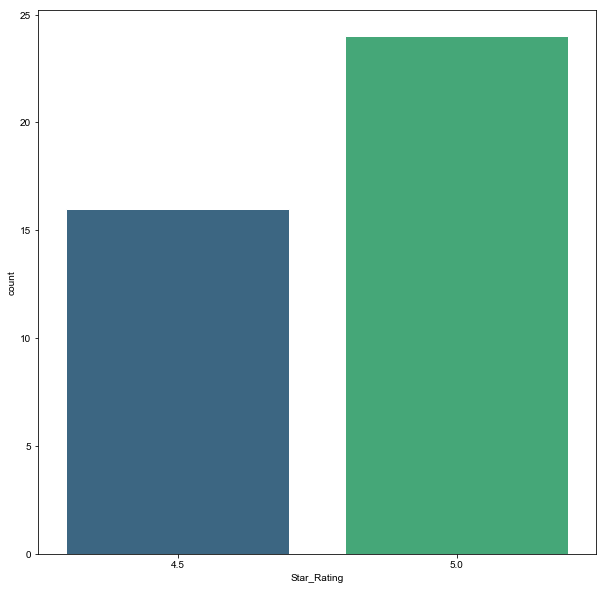

In [50]:
#Explore Star_Rating Column
fig,ax = plt.subplots(figsize=(10, 10))
sns.set_style('whitegrid')
sns.countplot(Dentist['Star_Rating'], palette = 'viridis')

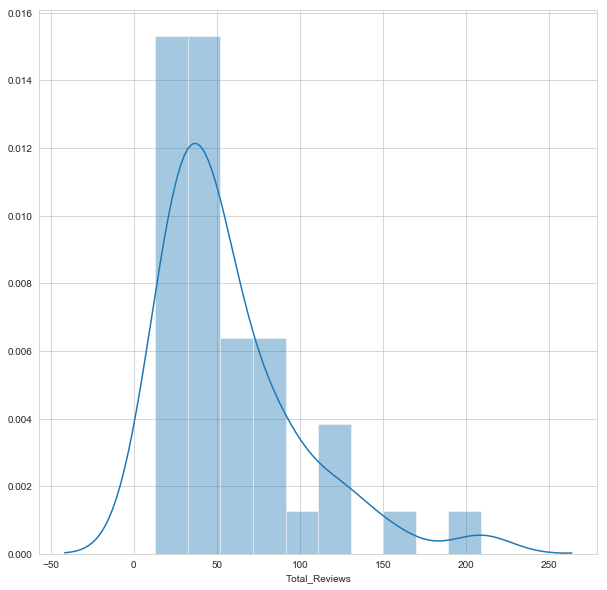

In [51]:
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(Dentist['Total_Reviews'], kde = True, bins = 10)

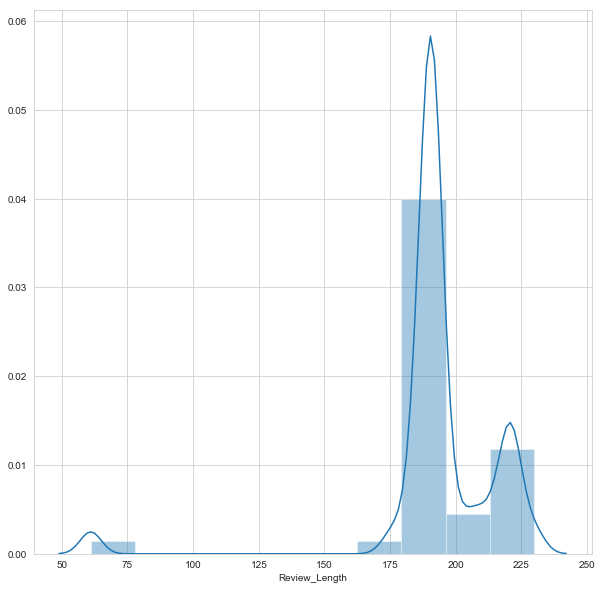

In [52]:
fig,ax = plt.subplots(figsize=(10,10))
sns.distplot(Dentist['Review_Length'], kde = True, bins = 10)

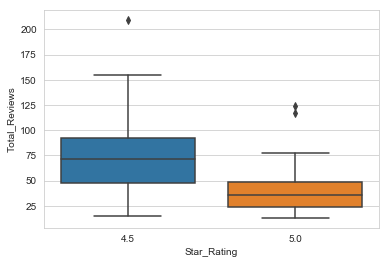

In [53]:
sns.boxplot(x='Star_Rating', y='Total_Reviews', data = Dentist)

**I will split the string of words (individual words) into token, mostly refered to as tokenization**

In [54]:
tokenized_reviews = Dentist['Reviews'].apply(lambda x: x.split())
tokenized_reviews.head()

0    [general, dentistry, oral, surgery, cosmetic, ...
1    [was, worth, it, Staff, is, friendly, and, the...
2    [and, professional, Not, many, people, can, sa...
3    [I, been, different, dentist, but, overall, th...
4    [I, am, SO, happy, I, found, this, place, I, u...
Name: Reviews, dtype: object

**I will stem all the words**

In [55]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_reviews = tokenized_reviews.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_reviews.head()

0    [gener, dentistri, oral, surgeri, cosmet, dent...
1    [wa, worth, it, staff, is, friendli, and, the,...
2    [and, profession, not, mani, peopl, can, say, ...
3    [I, been, differ, dentist, but, overal, thi, i...
4    [I, am, SO, happi, I, found, thi, place, I, us...
Name: Reviews, dtype: object

**Put all the words back together to form a string**

In [56]:
for i in range(len(tokenized_reviews)):
    tokenized_reviews[i] = ' '.join(tokenized_reviews[i])

Dentist['Reviews'] = tokenized_reviews

In [57]:
Dentist.head()

,Name,Star_Rating,Total_Reviews,Reviews,Address,Specialty,Review_Length
0,Midtown Dental Group,5.0,124,gener dentistri oral surgeri cosmet dentistri ...,241 W 37th St,"General Dentistry, Cosmetic Dentists, Dental H...",61
1,Tribeca Dental Design,4.5,129,wa worth it staff is friendli and the clinic i...,144 Chambers St,General Dentistry,221
2,Lumia Dental,5.0,38,and profession not mani peopl can say that the...,160 Broadway,"Cosmetic Dentists, General Dentistry, Pediatri...",193
3,iSmile Dental,4.5,87,I been differ dentist but overal thi is my bes...,144 N 8th St,"Cosmetic Dentists, General Dentistry, Orthodon...",191
4,Stanton E Young DMD,5.0,33,I am SO happi I found thi place I usual hate g...,14 E 4th St,"Cosmetic Dentists, General Dentistry, Pediatri...",191


**I want to visualize the data to identify most common words in the dataset**

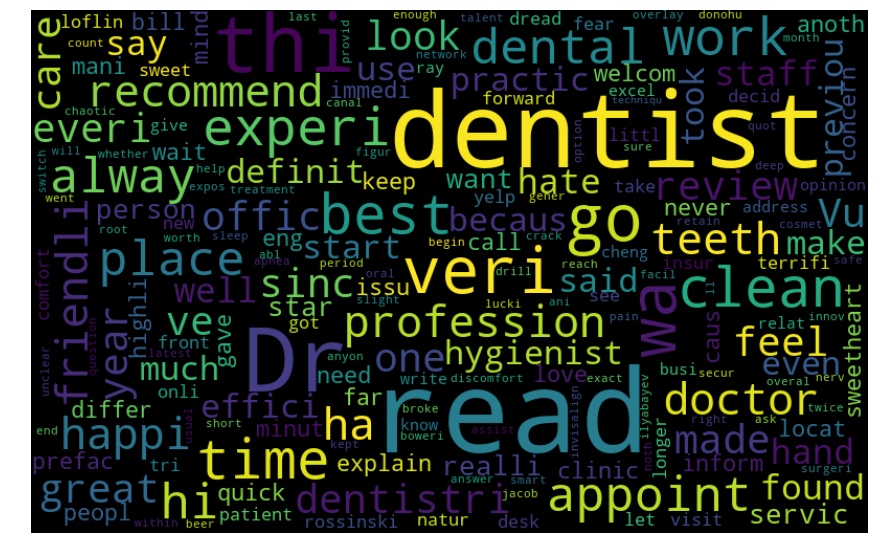

In [58]:
all_words = ' '.join([text for text in Dentist['Reviews']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(15, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

**It can be seen that most of the reviews are related the services provided by a dentist, with dentist, dr,dental being the most frequent words.**